# SECTIONS

1. Overall accuracy by model+embedding
2. Confusion Matrices
    - Precision/Recall plots
    - Confusion matrix plots
3. AI Interpretability, distilBERT/BERT

In [13]:
import os 
import pickle 
import model_funcs as mf
import numpy as np
import pandas as pd
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
train_x, test_x, train_y, test_y, label_map  = mf.get_train_test()

In [3]:
models = ['svm', 'xgb', 'bilstm', 'bert-based-uncased-', 'distilbert-base-uncased-', 'roberta-base-']
embeddings = list(mf.embedding_funcs.keys())

In [4]:
label_map
classes = list(label_map.keys())

# 1.  Overall Results

In [32]:
test_results = pd.read_csv('results/results.csv')
test_results[['model', 'embedding']] = test_results['model_name'].str.split('-', 1, expand=True)
test_results = test_results[['model_name', 'model', 'embedding', 'accuracy', 'f1']]
test_results[['accuracy', 'f1']] = test_results[['accuracy', 'f1']]*100.0
test_results

,model_name,model,embedding,accuracy,f1
0,svm-word2vec,svm,word2vec,82.10,82.27
1,svm-glove,svm,glove,79.40,79.56
2,svm-fasttext,svm,fasttext,80.40,80.78
3,svm-custom,svm,custom,80.40,80.72
4,xgb-word2vec,xgb,word2vec,78.98,79.26
5,xgb-glove,xgb,glove,74.29,73.85
6,xgb-fasttext,xgb,fasttext,78.69,78.83
7,xgb-custom,xgb,custom,79.55,79.68
8,bilstm-word2vec,bilstm,word2vec,77.70,77.76
9,bilstm-fasttext,bilstm,fasttext,73.44,73.74


In [7]:
test_results.groupby('model').mean().sort_values('accuracy', ascending = False)


,accuracy,f1
model,,
roberta,84.0900,83.9400
bert,81.5300,81.5300
svm,80.5750,80.8325
distilbert,79.8300,79.5900
xgb,77.8775,77.9050
bilstm,77.4875,77.6475


In [10]:
test_results.groupby('embedding').mean().sort_values('accuracy', ascending = False)


,accuracy,f1
embedding,,
base-,84.090000,83.940000
base-uncased-,80.680000,80.560000
word2vec,79.593333,79.763333
custom,79.263333,79.473333
glove,78.220000,78.160000
fasttext,77.510000,77.783333


# 2. Confusion Matrices

## Precision/Recall Plots

In [24]:
def plot_results(model, bert = 0):
    metrics = ['precision', 'recall', 'f1-score']
    colors = ['cyan', 'orange', 'green', 'brown']
    width_mapping = [-2, -1, 0, 1]
    x = np.arange(len(label_map.keys()))
    width = 0.2

    for m_idx, metric in enumerate(metrics): 
        if bert: 
            path = f"results/{model}-results.csv"
            try: 
                results_df = pd.read_csv(path)[metric]
                results_df = results_df.iloc[:len(classes)]
                plt.bar(x, results_df.values, width)
                plt.xticks(x, classes, rotation='vertical')
                plt.ylim([min(results_df)-0.15, 1.0])
                plt.title(f"{model.upper()}, {metric.upper()} Scores")
                plt.show() 
            except: 
                continue
        else: 
            for idx, emb in enumerate(embeddings): 
                model_concat = f"{model}-{emb}"
                path = f"results/{model_concat}-results.csv"
                try: 
                    results_df = pd.read_csv(path)[metric]
                    results_df = results_df.iloc[:len(classes)]
                except: 
                    continue
            
                plt.bar(x+width_mapping[idx]*width, results_df.values, width, color = colors[idx])
            plt.xticks(x, classes, rotation='vertical')
            plt.ylim([min(results_df)-0.15, 1.0])
            plt.xlabel("Classes")
            plt.title(f"{model.upper()}, {metric.upper()} Scores")
            plt.legend(embeddings)
            plt.show() 

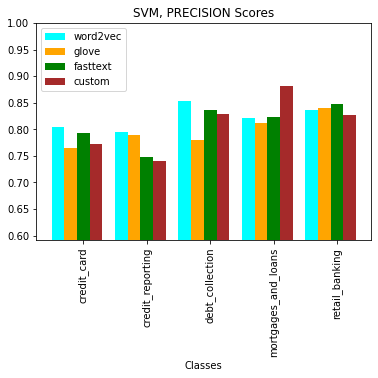

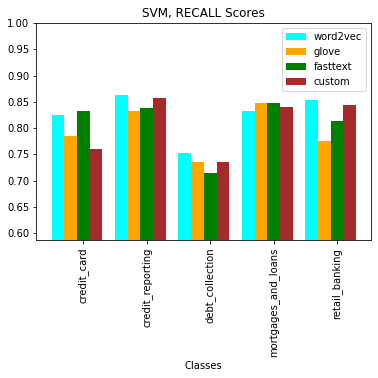

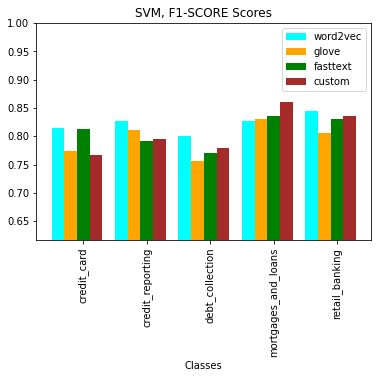

In [25]:
plot_results('svm')

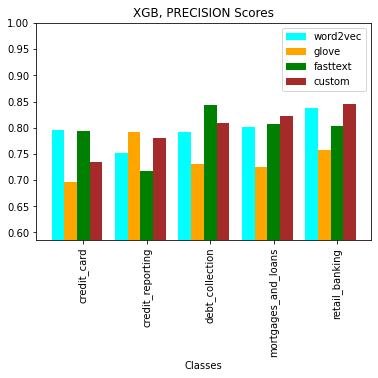

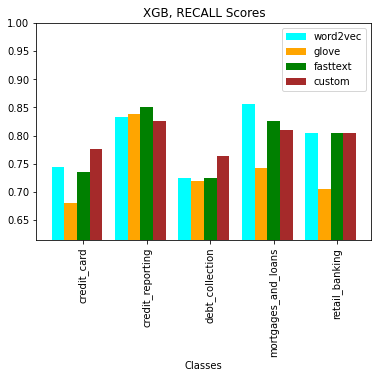

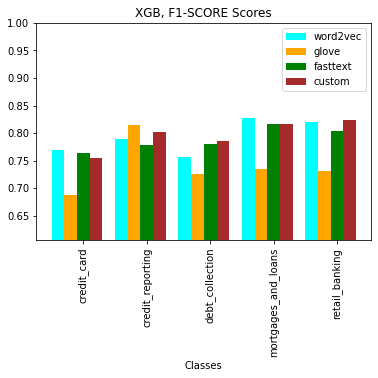

In [16]:
plot_results('xgb')

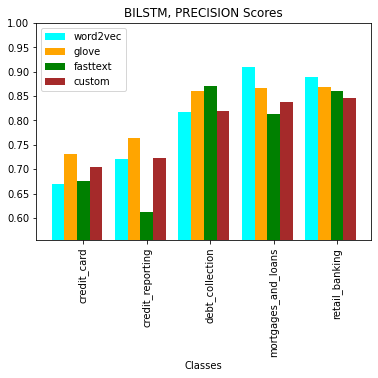

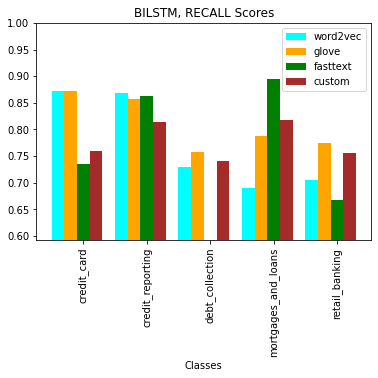

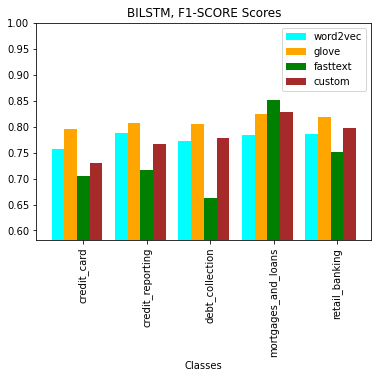

In [17]:
plot_results('bilstm')

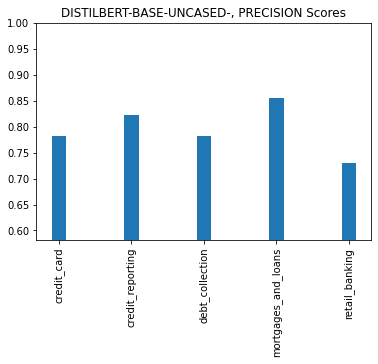

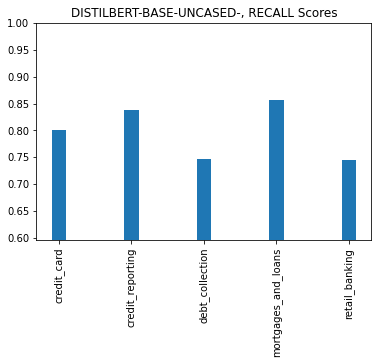

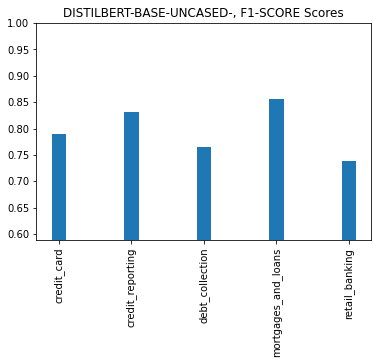

In [28]:
plot_results('distilbert-base-uncased-', bert = True)


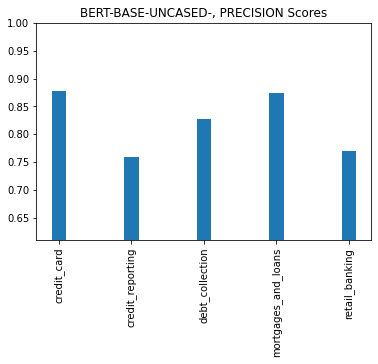

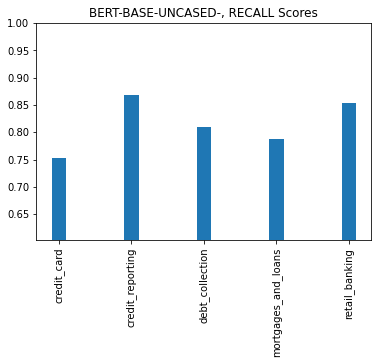

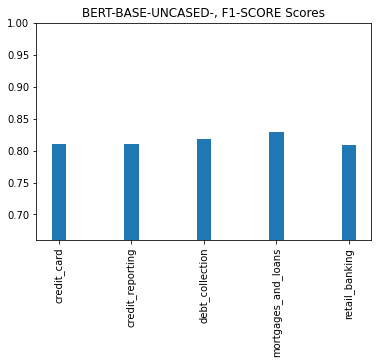

In [27]:
plot_results('bert-base-uncased-', bert = True)

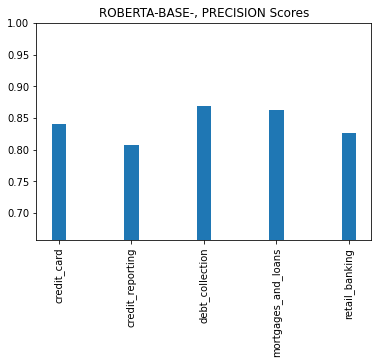

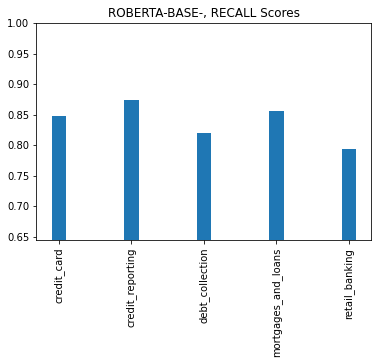

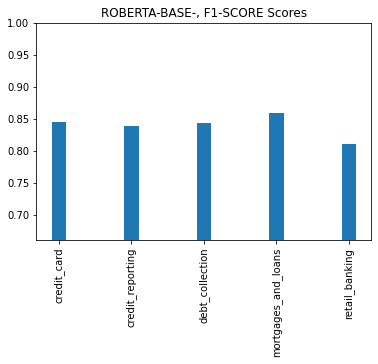

In [29]:
plot_results('roberta-base-', bert = True)


## Confusion Matrices

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_mats(model, bert = False):
    if bert: 
        path = f"results/{model}-conf_mat.csv"
        conf_mat = pd.read_csv(path, header = None, names = classes, dtype=np.float64)
        conf_mat.index = classes
        accuracy = test_results[test_results.model_name == model]['accuracy']

        sns.set(font_scale=1.2)
        sns.heatmap(conf_mat, annot=True, fmt='g', annot_kws={"size": 12})
        plt.title(f"{model.upper()}")
        plt.xlabel('PREDICTED')
        plt.ylabel('ACTUAL')
        plt.show()
    else: 
        for emb in embeddings: 
            model_concat = f"{model}-{emb}"
            path = f"results/{model_concat}-conf_mat.csv"
            try: 
                conf_mat = pd.read_csv(path, header = None, names = classes, dtype=np.float64)
            except: 
                continue
            conf_mat.index = classes
            accuracy = test_results[test_results.model_name == model_concat]['accuracy']

            sns.set(font_scale=1.2)
            sns.heatmap(conf_mat, annot=True, fmt='g', annot_kws={"size": 12})
            plt.title(f"{model.upper()}, {emb.upper()}")
            plt.xlabel('PREDICTED')
            plt.ylabel('ACTUAL')
            plt.show()

### SVM

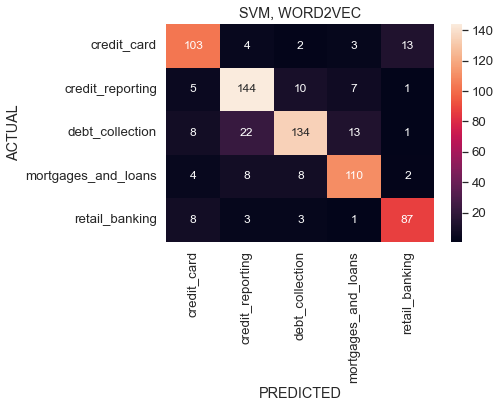

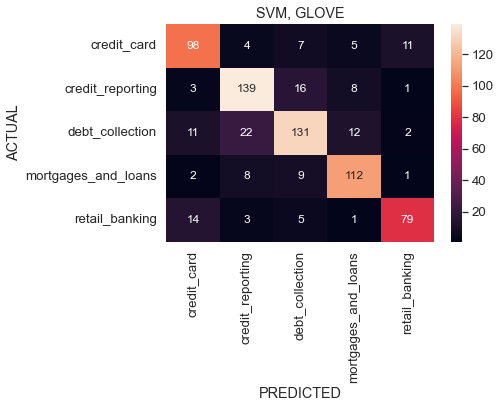

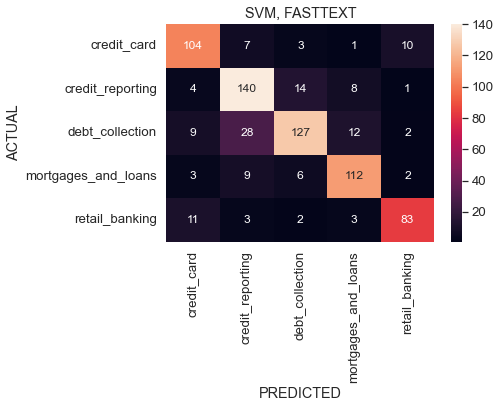

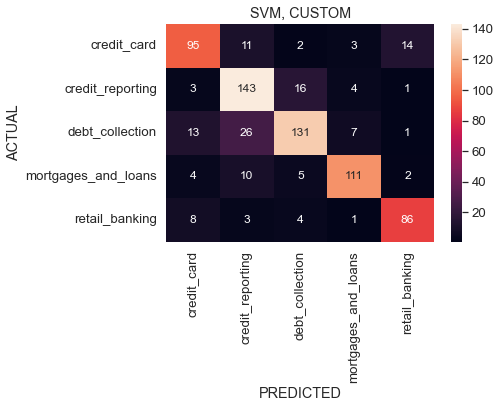

In [47]:
plot_conf_mats('svm')

### XBG

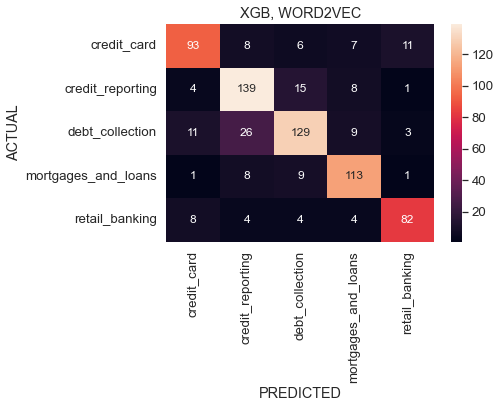

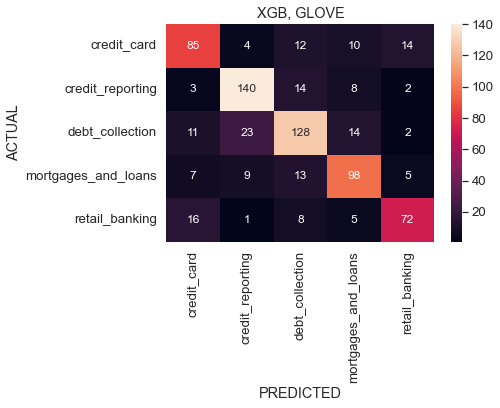

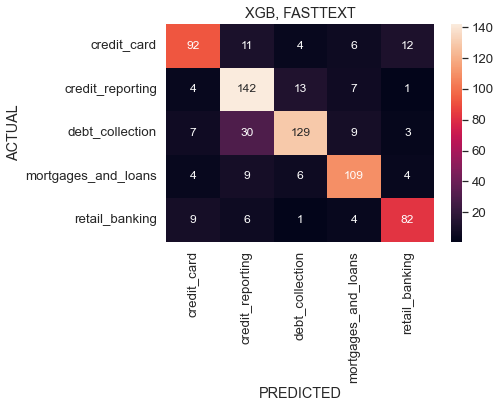

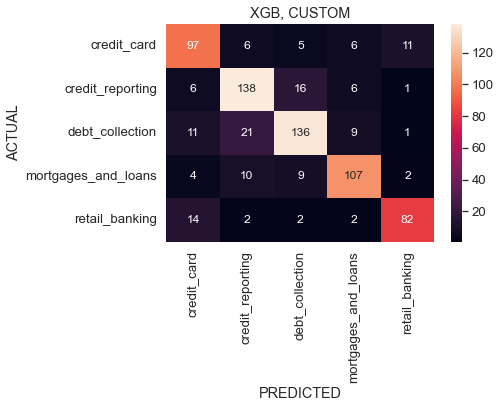

In [42]:
plot_conf_mats('xgb')

### Bi-LSTM

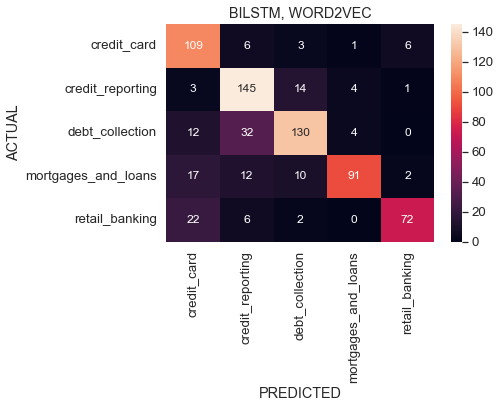

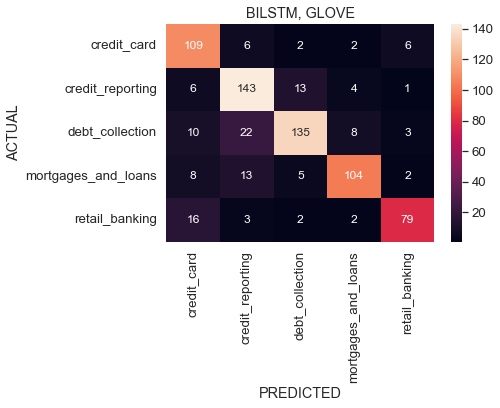

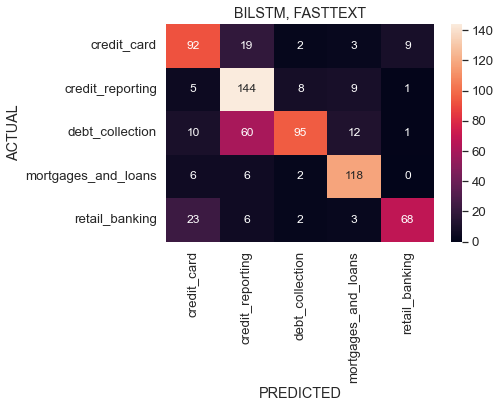

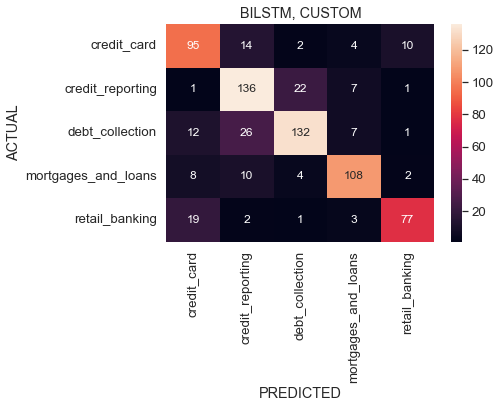

In [36]:
plot_conf_mats('bilstm')

### distilBERT/BERT

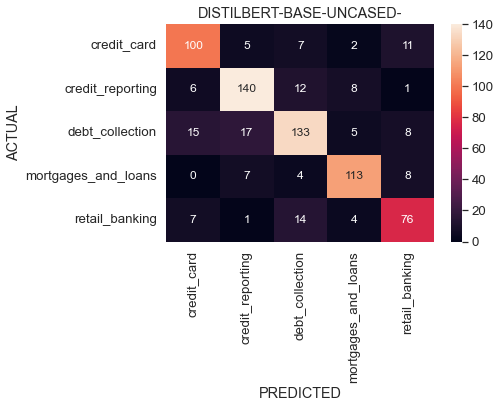

In [50]:
plot_conf_mats('distilbert-base-uncased-', bert = True)

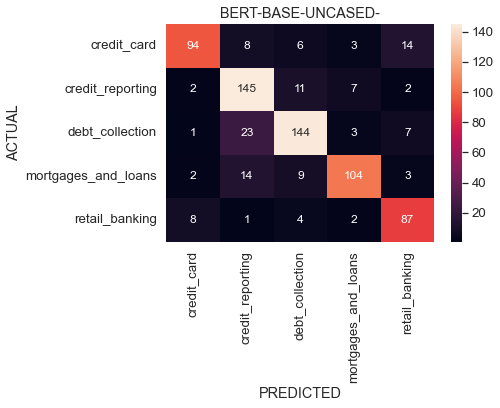

In [51]:
plot_conf_mats('bert-base-uncased-', bert = True)


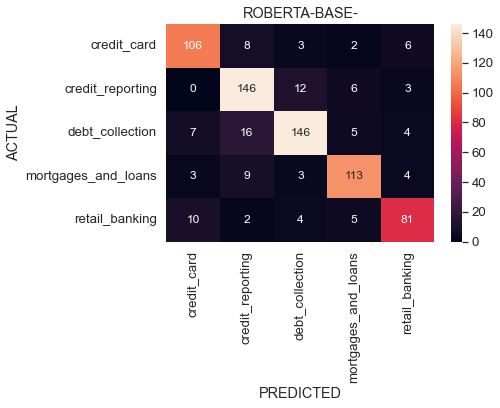

In [52]:
plot_conf_mats('roberta-base-', bert = True)


# 3. AI Interpretability

In [53]:
import random
from tensorflow.keras.models import load_model 
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers_interpret import SequenceClassificationExplainer

In [57]:
import _distilbert as db
model_name = "distilbert-base-uncased"
train_x, test_x, train_y, test_y, label_map  = mf.get_train_test()
train_x, test_x, train_y, test_y = mf.bert_processing(train_x, test_x, train_y, test_y)
x_train, x_test = mf.bert_tokenize(model_name, 
                                    AutoTokenizer, 
                                    train_x,
                                    test_x,
                                    max_length = 75)
model = db.model(x_train, train_y, model_name, max_length = 75)
model, history = db.train_model(model, x_train, train_y, x_test, test_y, 10, 16)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_transform', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_59']
You should probably TRAIN this model on a down-stream task to be able to use i

Epoch 1/10
396/396 [==============================] - 81s 191ms/step - loss: 1.4013 - acc: 0.3518 - val_loss: 1.2242 - val_acc: 0.4474
Epoch 2/10
396/396 [==============================] - 71s 179ms/step - loss: 1.1157 - acc: 0.4680 - val_loss: 1.0755 - val_acc: 0.4730
Epoch 3/10
396/396 [==============================] - 71s 181ms/step - loss: 0.9998 - acc: 0.6373 - val_loss: 1.0179 - val_acc: 0.6974
Epoch 4/10
396/396 [==============================] - 76s 192ms/step - loss: 0.9321 - acc: 0.7027 - val_loss: 0.9955 - val_acc: 0.7003
Epoch 5/10
396/396 [==============================] - 74s 188ms/step - loss: 0.8854 - acc: 0.7266 - val_loss: 0.9605 - val_acc: 0.7145
Epoch 6/10
396/396 [==============================] - 75s 190ms/step - loss: 0.8540 - acc: 0.7348 - val_loss: 0.9747 - val_acc: 0.7074
Epoch 7/10
396/396 [==============================] - 82s 207ms/step - loss: 0.8259 - acc: 0.7429 - val_loss: 0.9505 - val_acc: 0.7088
Epoch 8/10
396/396 [==============================] - 8

AttributeError: 'Functional' object has no attribute 'config'

Instances to review: 
- where is BERT making correct and incorrect classification decisions? 
- what are the top words (by positive and negative weights) that BERT uses to separate classes?

In [10]:
#Example
test_attributions = explainer(' '.join(train_x[0]))
test_attributions
explainer.visualize()

In [20]:
class_names = list(label_map.keys())

def get_weights(explainer, data_x, data_y, data_prop = 0.05, wt_threshold = 1.0, classification_type = None, n_samples = 10):
    """
    classification_type = 
        'True' --> get word attributions for correctly classified instances only
        'False' --> get word attributions for INcorrectly classified instances only
        'None' --> get all word attributions
    """ 
    n = len(data_x); sample_rate = n_samples/n
    samples = [] #return a few samples for visualization
    results = {c:{'pos': [], 'neg': []} for c in class_names}
    # for c, c_idx in label_map.items(): 
    for x, y_true in zip(data_x, data_y): 
        if random.random() < data_prop: 
            #Get weights for instance; store sample
            w_weights = explainer(' '.join(x))
            if random.random() < (sample_rate):
                samples.append(w_weights)
                explainer.visualize()
            y_pred = explainer.predicted_class_index; print(y_pred)
            correctly_classified = y_pred == y_true
            #Break conditions
            if classification_type == True and not correctly_classified: 
                continue
            elif classification_type == False and correctly_classified: 
                continue
            #Store results
            neg_weights = [(w, wt) for (w, wt) in w_weights if wt < 0 and np.abs(wt) >= wt_threshold]
            pos_weights = [(w, wt) for (w, wt) in w_weights if wt > 0 and np.abs(wt) >= wt_threshold]
            c_name = class_names[y_pred]

            results[c_name]['neg'].append(neg_weights)
            results[c_name]['pos'].append(pos_weights)
    return results, samples

def get_common_words(results, top_n = 30): 
    """For each class, determines the 'top_n' most heavily weighted positive and negative words"""
    results = {c:{'pos': [], 'neg': []} for c in class_names}
    for c in class_names:
        c_weights = {'pos': [], 'neg': []}
        for p in list(c_weights.keys()): 
            top_n = []
            polarity_weights = results[c][p]
            for x_weights in polarity_weights: 
                desc = True if p == 'pos' else False
                num_words = min(len(x_weights), top_n)
                top_n.extend(x_weights)
                top_n = sorted(top_n, key = lambda tup: tup[1], reverse = desc)[:num_words]
            c_weights[p] = top_n 
    return results

In [ ]:
wrong_preds_weights, wrong_samples = get_weights(explainer, test_x, test_y, 0.01, classification_type = False)

In [ ]:
correct_preds_weights, correct_samples = get_weights(explainer, test_x, test_y, 0.01, classification_type = True)

In [ ]:
correct_common_words = get_common_words(correct_preds_weights, top_n = 50)
print(correct_common_words)

In [ ]:
wrong_common_words = get_common_words(wrong_preds_weights, top_n = 50)
print(wrong_common_words)